In [2]:
using DataFrames
using Plots
using CSV
using Statistics
using Dates

In [3]:
using DelimitedFiles

In [4]:
ccc_covid = DataFrame(CSV.File("ccc_covid.txt"))
ccc_przed = DataFrame(CSV.File("ccc_przed.txt"))
cd_proj_covid = DataFrame(CSV.File("cd_projekt_covid.txt"))
cd_proj_przed = DataFrame(CSV.File("cd_projekt_przed.txt"))
kghm_przed = DataFrame(CSV.File("kghm_przed.txt"))
kghm_covid = DataFrame(CSV.File("kghm_covid.txt"))
orlen_przed = DataFrame(CSV.File("pknorlen_przed.txt"))
orlen_covid = DataFrame(CSV.File("pknorlen_covid.txt"))
santander_covid = DataFrame(CSV.File("santander_covid.txt"))
santander_przed = DataFrame(CSV.File("santander_przed.txt"))

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
,Date,Float64,Float64,Float64,Float64,Int64
1,2019-02-27,361.61,362.56,357.26,358.21,49397
2,2019-02-28,351.58,362.94,351.2,356.31,364276
3,2019-03-01,357.83,365.78,356.88,364.07,93493
4,2019-03-04,365.4,365.4,354.99,359.72,76407
5,2019-03-05,355.93,365.02,355.37,357.26,96738
6,2019-03-06,359.72,363.7,356.31,360.67,45650
7,2019-03-07,361.99,364.45,358.77,362.18,29844
8,2019-03-08,359.53,360.86,353.09,353.47,61941
9,2019-03-11,355.55,356.31,349.69,349.87,82228


In [5]:
zloto_przed = DataFrame(CSV.File("ZLOTO_PRZED.txt"))
zloto_covid = DataFrame(CSV.File("ZLOTO_COVID.txt"))
dni_zloto = readdlm("only_dates.txt")
dni = readdlm("daty_gielda.txt")
zarazenia_w_dni_GPW = DataFrame(CSV.File("zarazeni_w_dni_GPW.txt"))

,Dzien,lacznie,dzienny_przyrost
,Date,Int64,Int64
1,2020-03-04,1,1
2,2020-03-05,1,0
3,2020-03-06,5,4
4,2020-03-09,17,6
5,2020-03-10,22,5
6,2020-03-11,31,9
7,2020-03-12,51,20
8,2020-03-13,68,17
9,2020-03-16,177,52


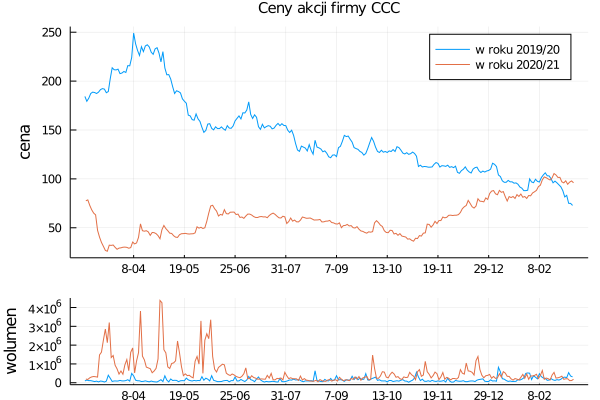

In [6]:
otwarcie_przed = plot(dni[1:end], ccc_przed[1:end, 2], 
    title="Ceny akcji firmy CCC", 
    ylabel="cena",
    label = "w roku 2019/20",
    legend=:best, 
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(ccc_covid[1:end, 2], label = "w roku 2020/21")

wolumen_przed = plot(dni[1:end], ccc_przed[1:end, 6], 
    xlabel = "data", 
    ylabel="wolumen",
    legend=false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(ccc_covid[1:end, 6])

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.8,0.3]))

In [7]:
std(ccc_przed[1:end, 2]; corrected = false)

40.14278547045013

In [8]:
std(ccc_covid[1:end, 2]; corrected = false)

18.20488207504154

In [9]:
sum(ccc_covid[1:end, 6] - ccc_przed[1:end, 6])

111617500

In [10]:
cor(zarazenia_w_dni_GPW[1:end, 3], ccc_covid[1:end, 2])

0.20467422717516062

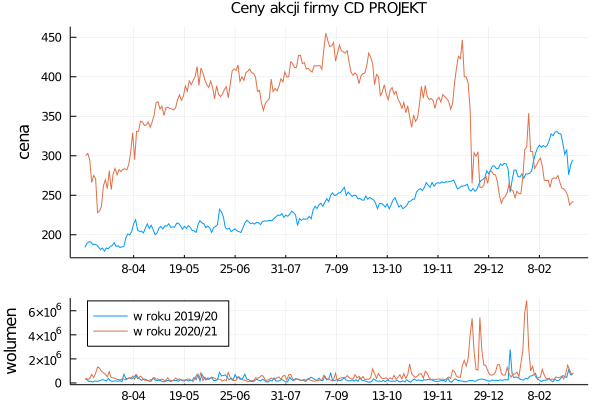

In [11]:
otwarcie_przed = plot(dni[1:end], cd_proj_przed[1:end, 2], 
    title="Ceny akcji firmy CD PROJEKT",
    ylabel="cena",
    legend=false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(cd_proj_covid[1:end, 2])

wolumen_przed = plot(dni[1:end], cd_proj_przed[1:end, 6],
    xlabel = "data", 
    ylabel="wolumen",
    label = "w roku 2019/20",
    legend=:topleft, 
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(cd_proj_covid[1:end, 6], label = "w roku 2020/21")

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.8,0.3]))

In [12]:
std(cd_proj_przed[1:end, 2]; corrected = false)

35.17766892513618

In [13]:
std(cd_proj_covid[1:end, 2]; corrected = false)

59.572434344512146

In [14]:
sum(cd_proj_covid[1:end, 6] - cd_proj_przed[1:end, 6])

91143250

In [15]:
cor(zarazenia_w_dni_GPW[1:end, 3], cd_proj_covid[1:end, 2])

-0.18968193309340411

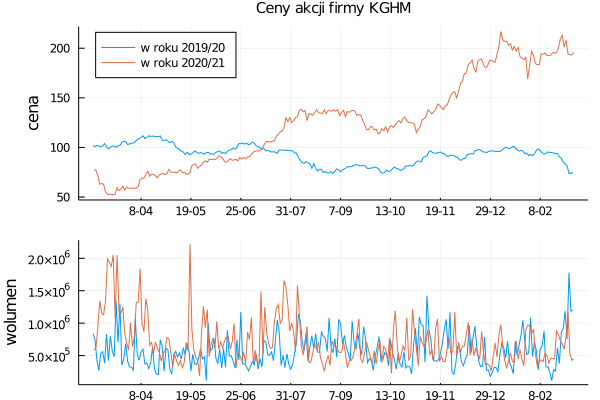

In [16]:
otwarcie_przed = plot(dni[1:end], kghm_przed[1:end, 2], 
    title="Ceny akcji firmy KGHM",  
    ylabel="cena",
    label = "w roku 2019/20", 
    legend=:topleft,
    titlefont=font(10),
    legendfont=font(8),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(kghm_covid[1:end, 2], label = "w roku 2020/21")

wolumen_przed = plot(dni[1:end], kghm_przed[1:end, 6], 
    xlabel = "data", 
    ylabel="wolumen", 
    legend=false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(kghm_covid[1:end, 6])

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.6,0.5]))

In [17]:
std(kghm_przed[1:end, 2]; corrected = false)

9.723155481214155

In [18]:
std(kghm_covid[1:end, 2]; corrected = false)

45.26171372634453

In [19]:
sum(kghm_covid[1:end, 6] - kghm_przed[1:end, 6])

36342619

In [20]:
cor(zarazenia_w_dni_GPW[1:end, 3], kghm_covid[1:end, 2])

0.5077816499261145

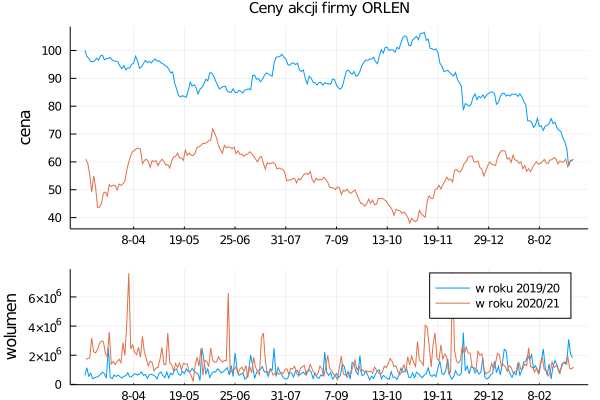

In [21]:
otwarcie_przed = plot(dni[1:end], orlen_przed[1:end, 2], 
    title="Ceny akcji firmy ORLEN",
    ylabel="cena",
    legend=false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(orlen_covid[1:end, 2])

wolumen_przed = plot(dni[1:end], orlen_przed[1:end, 6],  
    xlabel = "data", 
    ylabel="wolumen",
    label = "w roku 2019/20", 
    legend=:topright,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(orlen_covid[1:end, 6], label = "w roku 2020/21")

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.7,0.4]))

In [22]:
std(orlen_przed[1:end, 2]; corrected = false)

8.759952635477358

In [23]:
std(orlen_covid[1:end, 2]; corrected = false)

7.259530262336789

In [24]:
sum(orlen_covid[1:end, 6] - orlen_przed[1:end, 6])

155026186

In [25]:
cor(zarazenia_w_dni_GPW[1:end, 3], orlen_covid[1:end, 2])

-0.36834745048443757

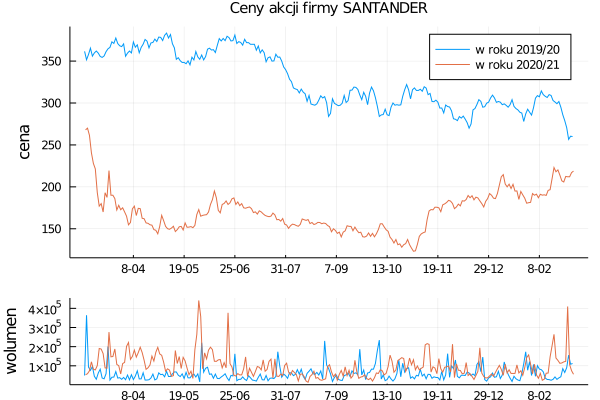

In [26]:
otwarcie_przed = plot(dni[1:end], santander_przed[1:end, 2], 
    title="Ceny akcji firmy SANTANDER",
    ylabel="cena",
    label = "w roku 2019/20", 
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(santander_covid[1:end, 2], label = "w roku 2020/21")

wolumen_przed = plot(dni[1:end], santander_przed[1:end, 6],
    xlabel = "data", 
    ylabel="wolumen",
    legend=:false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(santander_covid[1:end, 6])

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.8,0.3]))

In [27]:
std(santander_przed[1:end, 2]; corrected = false)

33.75789834128641

In [28]:
std(santander_covid[1:end, 2]; corrected = false)

24.45177426312551

In [29]:
sum(santander_covid[1:end, 6] - santander_przed[1:end, 6])

9621982

In [30]:
cor(zarazenia_w_dni_GPW[1:end, 3], santander_covid[1:end, 2])

0.04146645600279658

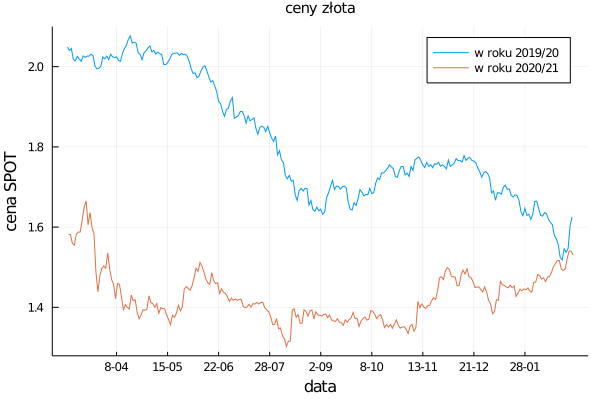

In [31]:
otwarcie = plot(dni_zloto[1:end],zloto_przed[1:end, 2], 
    title="ceny złota", 
    ylabel="cena SPOT",
    label = "w roku 2019/20",
    legend=:best, 
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))

Wiki = plot!(zloto_covid[1:end, 2], 
    xlabel = "data",
    label = "w roku 2020/21",
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))

In [32]:
std(zloto_przed[1:end, 2]; corrected = false)

0.15254219134738178

In [33]:
std(zloto_covid[1:end, 2]; corrected = false)

0.06401263546069542

In [31]:
szczepienia = DataFrame(CSV.File("vaccination_data.txt"))

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate
,String,Float64,Float64,Float64?,Float64?,Float64?
1,04.03.2020,1.0,1.0,missing,missing,missing
2,05.03.2020,1.0,0.0,missing,missing,missing
3,06.03.2020,5.0,4.0,missing,missing,missing
4,07.03.2020,5.0,0.0,missing,missing,missing
5,08.03.2020,11.0,6.0,missing,missing,missing
6,09.03.2020,16.0,5.0,missing,missing,missing
7,10.03.2020,22.0,6.0,missing,missing,missing
8,11.03.2020,31.0,9.0,missing,missing,missing
9,12.03.2020,49.0,18.0,1.0,1.0,missing


In [32]:
mutable struct Person1
    zyje::Bool
    chetny_do_szczepienia::Bool
    zaszczepiony1::Bool
    zaszczepiony2::Bool
    zasz_data_1::Int16 #data jako numer dnia od poczatku trwania pandemii
    zasz_data_2::Int16
    zarazony::Bool
    data_zarazenia::Int16
end

In [33]:
function zaraza(szczepienia, dl_prognozy::Int, chec_szczepienia::Float64)
    """
    funkcja przyjmuje dopasowany zestaw danych, dlugosc prognozy w dniach i chec spoleczenstwa do szczepien. 
    Zwraca tablice o 4 kolumnach z:
    dzienna liczba zarazen, dziennej liczbie smierci, liczbie zaszczepionych 1 i 2 dawka.
    """
    populacja = Int64(maximum(szczepienia[2:end, 22]))
    Polacy = Vector{Person1}(undef, populacja)
    
    for i in 1:populacja
        Polacy[i] = Person1(false, false, false, false, 0, 0 , false, 0)
    end
    
    # Tworzenie przybliżonej obecnej (2021-06-04) sytuacji:
    
    #chec_szczepienia = 0.57 #obecna sytuacja posrod niezaszczepionych osob
    liczba_przypadkow = Int64(szczepienia[457,2])
    liczba_zgonow = Int64(szczepienia[457,4])
    liczba_zaszczepionych1 = Int64(szczepienia[457,14])
    liczba_zaszczepionych2 = Int64(szczepienia[457,15])
    obecni_zarazeni = Int64(sum(szczepienia[450:457,3])) #zalozenie ze obecni zarazeni choruja i roznosza chorobe przez tydzien
    obecni_zarazeni2 = obecni_zarazeni
    
    for i in 1:populacja
        if rand()<(1 - liczba_zgonow/populacja)
            Polacy[i].zyje = true
            if rand()<liczba_zaszczepionych1/populacja
                Polacy[i].chetny_do_szczepienia = true
                Polacy[i].zaszczepiony1 = true
                if rand()<liczba_zaszczepionych2/liczba_zaszczepionych1
                    Polacy[i].zaszczepiony2 = true
                else
                    Polacy[i].zasz_data_1 = rand(422:457) # przyblizony okres pierwszego szczepienia
                end
            else
                if rand()<chec_szczepienia
                    Polacy[i].chetny_do_szczepienia = true
                end
                if obecni_zarazeni2 > 0
                    Polacy[i].zarazony = true
                    Polacy[i].data_zarazenia = rand(450:457)
                    obecni_zarazeni2 -= 1
                end
            end
        end
    end

    # Tworzenie tablicy z danymi na okreslona dlugosc i symulacja zmianiajacej sie sytuacji:
    
    Tablica = zeros(Int64, dl_prognozy+1, 6)
    obecny_dzien = 458
    ozdrowiency = szczepienia[450,3]
    
    #surowosc_obostrzen = szczepienia[457, 21]
    #reprodukcja_wirusa = szczepienia[457, 6]
    
    
                   #dzienne zarazenia         dzienna smierc             liczba_zaszczepionych1  liczba_zaszczepionych2   obecnie zarazeni
    Tablica[1,:] = [Int64(szczepienia[457,3]), Int64(szczepienia[457,5]), liczba_zaszczepionych1, liczba_zaszczepionych2, obecni_zarazeni, ozdrowiency]
    
    #println(obecni_zarazeni) 
    
    for i in 2:dl_prognozy+1
        
        obecni_zarazeni = Tablica[i-1,5]
        szansa_kontaktu_z_zarazonym = 0.15 * obecni_zarazeni/populacja #zalozenie ze spotykamy 10osob dziennie srednio
        skutecznosc1 = 0.5
        skutecznosc2 = 0.9
        dzisiaj_smierc = 0
        dzisiaj_zarazeni = 0
        dzisiaj_zaszczepieni = 0
        dzisiaj_zaszczepieni2 = 0
        ozdrowiency = 0
        
        
        for i in 1:populacja
            if Polacy[i].zyje
                
                if Polacy[i].zarazony                                        #co z zarazonymi/smierc
                    
                    if Polacy[i].data_zarazenia+7 <= obecny_dzien
                        praw = rand()
                        if praw<0.9 # po 7dniach szansa wyzdrowienia 90% kazdego dnia
                            Polacy[i].zarazony = false
                            Polacy[i].data_zarazenia = 0
                            obecni_zarazeni -= 1
                            ozdrowiency += 1
                        elseif praw<0.927 # zakladamy, ze moga umrzec tylko ci co choruja ponad tydzien
                            """
                            3% umiera, wiec po tym tygodniu zostaje to 30%, zatem szukamy x takiego, ze:
                            0.03 = x * szereg((0.1)^i)
                            czyli wychodzi, ze prawdopodobienstwo smierci po 7dniu choroby to 0.27 kazdego dnia
                            """
                            Polacy[i].zyje = false
                            Polacy[i].data_zarazenia = 0
                            dzisiaj_smierc += 1
                            obecni_zarazeni -= 1
                        end
                    end
                        
                    
                
                else                                                         #szansa zachorowania + zaszczepienia(not yet)
                   
                    
                    prawd = rand() # by przyspieszyc program
                    if Polacy[i].zaszczepiony1
                        if Polacy[i].zaszczepiony2                                       #przy 2dawkach
                            if prawd < szansa_kontaktu_z_zarazonym && rand()>skutecznosc2
                                Polacy[i].zarazony = true
                                Polacy[i].data_zarazenia = obecny_dzien
                                obecni_zarazeni += 1
                                dzisiaj_zarazeni += 1
                            end
                        else                                                             #przy 1dawce
                            if prawd < szansa_kontaktu_z_zarazonym && rand()>skutecznosc1
                                Polacy[i].zarazony = true
                                Polacy[i].data_zarazenia = obecny_dzien
                                obecni_zarazeni += 1
                                dzisiaj_zarazeni += 1
                            elseif Polacy[i].zasz_data_1+35 <= obecny_dzien
                                Polacy[i].zaszczepiony2 = true
                                dzisiaj_zaszczepieni += 1
                                dzisiaj_zaszczepieni2 += 1
                            end
                        end
                    else                                                                 #niezaszczepiony
                        if prawd < szansa_kontaktu_z_zarazonym
                            Polacy[i].zarazony = true
                            Polacy[i].data_zarazenia = obecny_dzien
                            obecni_zarazeni += 1
                            dzisiaj_zarazeni += 1
                        elseif Polacy[i].chetny_do_szczepienia == true && Polacy[i].zasz_data_1 != obecny_dzien
                            Polacy[i].zasz_data_1 = obecny_dzien + rand(15:50)                        
                        elseif Polacy[i].zasz_data_1 == obecny_dzien
                            Polacy[i].zaszczepiony1 = true
                            dzisiaj_zaszczepieni += 1
                        end
                    end
                end
            end
        end
        println("test", i) #dla ogladania szybkosci postepu kodu
        #aktualizacja tablicy:
        Tablica[i,:] = [dzisiaj_zarazeni,dzisiaj_smierc,Tablica[i-1,3]+dzisiaj_zaszczepieni,Tablica[i-1,4]+dzisiaj_zaszczepieni2,obecni_zarazeni, ozdrowiency]
        obecny_dzien += 1 
    end
    
    
    return Tablica
end

zaraza (generic function with 1 method)

In [34]:
daty_symulacji = collect(Date(2021,6,4):Dates.Day(1):Date(2022,6,4))
symulacja_10 = DataFrame(CSV.File("symulacja_10proc.csv")) #dla 44,5% chętnych/zaszczepionych
symulacja_40 = DataFrame(CSV.File("symulacja_40proc.csv")) #dla 62,5% chętnych/zaszczepionych
symulacja_90 = DataFrame(CSV.File("symulacja_90proc.csv")) #dla 94% chętnych/zaszczepionych
symulacja_mutacji_10 = DataFrame(CSV.File("mutacja_srednia_symulacja_10proc.csv"))
symulacja_mutacji_40 = DataFrame(CSV.File("mutacja_srednia_symulacja_40proc.csv"))
symulacja_mutacji_90 = DataFrame(CSV.File("mutacja_srednia_symulacja_90proc.csv"))

,dzienne_zarazenia,dzienna_smierc,lacznie_1_dawka,lacznie_2_dawka,teraz_zarazeni
,Int64,Int64,Int64,Int64,Int64
1,565,91,14224874,7777048,5642
2,1019,37,14224874,8134192,5318
3,920,8,14224874,8313358,5466
4,999,28,14224874,8491626,5769
5,1044,24,14224874,8669677,6123
6,1131,21,14224874,8848447,6553
7,1151,23,14224874,9027581,7026
8,1228,20,14224874,9206227,7546
9,1354,28,14224874,9385306,7905


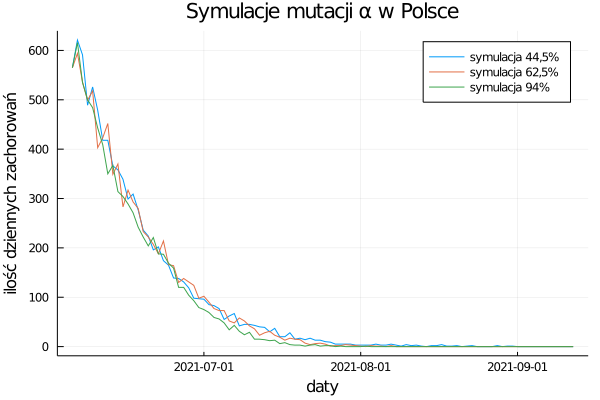

In [35]:
plot(daty_symulacji[2:101,1],
    symulacja_10[1:100,1],
    label="symulacja 44,5%",
    xlabel="daty",
    ylabel="ilość dziennych zachorowań",
    title="Symulacje mutacji α w Polsce")
plot!(daty_symulacji[2:101,1], 
    symulacja_40[1:100,1],
    label="symulacja 62,5%")
plot!(daty_symulacji[2:101,1],
    symulacja_90[1:100,1],
    label="symulacja 94%")

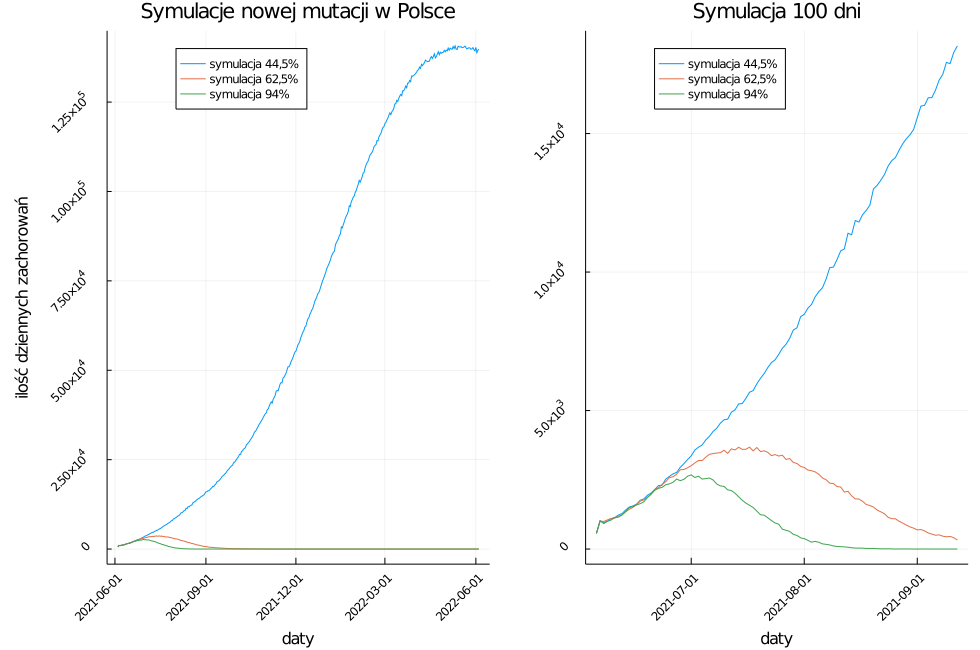

In [36]:
symulacja_100 = plot(daty_symulacji[2:101,1],
    symulacja_mutacji_10[1:100,1],
    label="symulacja 44,5%",
    legend=:top, 
    xlabel="daty",
    rotation=45,    
    title="Symulacja 100 dni")
plot!(daty_symulacji[2:101,1],
    symulacja_mutacji_40[1:100,1],
    label="symulacja 62,5%")
symul_100 = plot!(daty_symulacji[2:101,1],
    symulacja_mutacji_90[1:100,1],
    label="symulacja 94%")

symulacja_366 = plot(daty_symulacji[:,1],
    symulacja_mutacji_10[:,1],
    label="symulacja 44,5%",
    legend=:top,
    rotation=45,
    xlabel="daty",
    ylabel="ilość dziennych zachorowań",
    title="Symulacje nowej mutacji w Polsce")
plot!(daty_symulacji[:,1], 
    symulacja_mutacji_40[:,1], 
    label="symulacja 62,5%")
symul_366 = plot!(daty_symulacji[:,1], 
    symulacja_mutacji_90[:,1], 
    label="symulacja 94%")

plot(symul_366, symul_100, size=(980, 650))

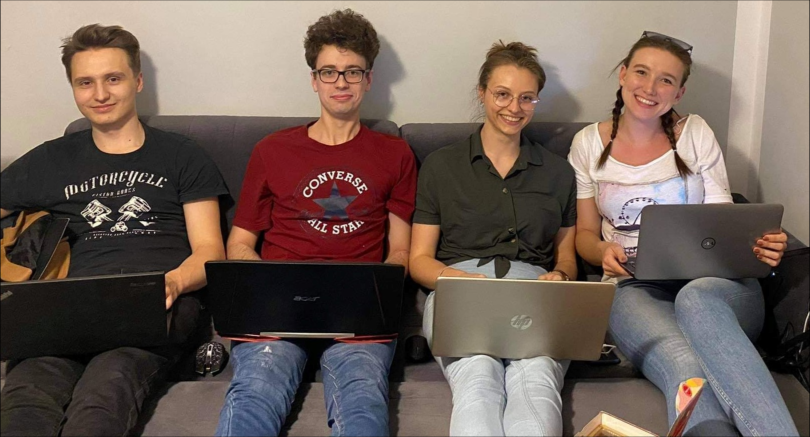

In [38]:
using Images
load("hard_work.jpg")

Bibliografia:

* https://stooq.pl/q/d/?s=plnxau&c=0&d1=20200304&d2=20210303
*https://ourworldindata.org/covid-vaccinations?country=POL&fbclid=IwAR1O5wvikx9ZHOoq3F5vyrf6IFuvY9xPFCxd57O77bT1wwVk39rf_m66UIg